In [17]:
import pandas as pd
import numpy as np

# Load data

In [18]:
all_df = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
item_info_df = pd.read_csv('ml-100k/u.item', sep='|', names=['item_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'], encoding='latin-1')
users = all_df.user_id.unique()
items = all_df.item_id.unique()
n_users = users.shape[0]  
n_items = items.shape[0]


In [19]:
all_df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [20]:
item_info_df

,item_id,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# split the data into training and test sets
train_df = all_df.sample(frac=0.75, random_state=42)
test_valid_df = all_df.drop(train_df.index)
valid_df = test_valid_df.sample(frac=0.4, random_state=42)
test_df = test_valid_df.drop(valid_df.index)

# Features

In [22]:
from itertools import combinations

# item similarity matrix

In [23]:
from sklearn.metrics.pairwise import pairwise_distances

In [24]:
train_ui_matrix = np.zeros((n_users, n_items))
for row in train_df.itertuples(index=False):
    train_ui_matrix[row[0]-1, row[1]-1] = row[2]

valid_ui_matrix = np.zeros((n_users, n_items))
for row in valid_df.itertuples(index=False):
    valid_ui_matrix[row[0]-1, row[1]-1] = row[2]
    
test_ui_matrix = np.zeros((n_users, n_items))
for row in test_df.itertuples(index=False):
    test_ui_matrix[row[0]-1, row[1]-1] = row[2]

In [25]:
item_similarity = np.ones((n_items, n_items)) - pairwise_distances(train_ui_matrix.T, metric='cosine')

# genre similarity matrix

In [26]:
genre = item_info_df.drop(['item_id', 'title', 'release_date', 'video_release_date', 'imdb_url'], axis=1).to_numpy()

In [27]:
genre_similarity = np.ones((n_items, n_items)) - pairwise_distances(genre, metric='cosine')

# Bipartite Graph

In [29]:
import networkx as nx
from networkx.algorithms import bipartite

In [30]:
beta = 0.8

In [31]:
UIG = nx.Graph()
UIG.add_nodes_from(users, bipartite=0)
UIG.add_nodes_from(items, bipartite=1)
edges = all_df[['user_id', 'item_id']].values
UIG.add_edges_from(edges)

In [32]:
IG = bipartite.overlap_weighted_projected_graph(UIG, items)
IG_edges = list(IG.edges(data=True))

In [33]:
IG_matrix = np.zeros((n_items, n_items))
for item_id_0, item_id_1, weight in IG_edges:
    IG_matrix[item_id_0 - 1, item_id_1 - 1] = weight['weight']
    IG_matrix[item_id_1 - 1, item_id_0 - 1] = weight['weight']

# Transition Matrix

In [34]:
transition_matrix_item = np.zeros((n_items, n_items))
transition_matrix_BG = np.zeros((n_items, n_items))
transition_matrix_genre = np.zeros((n_items, n_items))
for i in range(n_items):
    sim_sum = item_similarity[i].sum()
    genre_sum = genre_similarity[i].sum()
    bg_sum = IG_matrix[i].sum()
    for j in range(n_items):
        transition_matrix_item[i,j] = item_similarity[i][j]/sim_sum
        transition_matrix_BG[i,j] = IG_matrix[i][j]/bg_sum
        transition_matrix_genre[i,j] = genre_similarity[i][j]/genre_sum

# Random walk frame work

In [155]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from tqdm import tqdm

In [158]:
scaler = MinMaxScaler()

def random_walk_predict(ratings, transition_matrix, alpha):
    p_tilde = np.linalg.pinv(np.eye(n_items)-alpha*transition_matrix)
    final_rating = alpha*np.dot(ratings, np.dot(transition_matrix, p_tilde))
    scaled_prediction = (scaler.fit_transform(final_rating.T)*5).T
    return scaled_prediction

In [48]:
def rmse(prediction, test_data_matrix):
    mask = test_data_matrix.nonzero()
    prediction = prediction[mask].flatten()
    truth = test_ui_matrix[mask].flatten()
    return sqrt(mean_squared_error(prediction, truth))

## parameter selection round 1

In [44]:
alphas = [0.7, 0.8, 0.9, 1.0]
betas = [0.6, 0.7, 0.8, 0.9, 1.0]
w1s = w2s = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
weights = [(w1, w2) for w1 in w1s for w2 in w2s if w1 + w2 <= 1 ]
parameters = [(alpha, beta, w1, w2) for alpha in alphas for beta in betas for w1, w2 in weights]

In [170]:
def run_grid_search(parameters):
    results = {}
    for parameter in tqdm(parameters):
        alpha, beta, w1, w2 = parameter
        transition_matrix = beta*(w1*transition_matrix_item + w2*transition_matrix_BG + (1-w1-w2)*transition_matrix_genre) + (1-beta)/n_items
        prediction = random_walk_predict(train_ui_matrix, transition_matrix, alpha)
        results[parameter] = rmse(prediction, valid_ui_matrix)
    return results
    

In [ ]:
results = run_grid_search(parameters)

In [181]:
alpha, beta, w1, w2 = min(results, key=results.get)

In [182]:
alpha, beta, w1, w2

(1.0, 0.6, 0.3, 0.0)

In [167]:
transition_matrix = beta*(w1*transition_matrix_item + w2*transition_matrix_BG + (1-w1-w2)*transition_matrix_genre) + (1-beta)/n_items
best_prediction = random_walk_predict(train_ui_matrix, transition_matrix, alpha)
best_error = rmse(best_prediction, test_ui_matrix)

In [163]:
print('best rmse for random walk: {}'.format(best_error))

best rmse for random walk: 1.2500965114724916


In [174]:
# save the results for plotting
import pickle
pickle.dump(results, open('results.pkl', 'wb'))

## Analyze


In [76]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [74]:
results_list = [[*key, value] for key, value in results.items()]

In [75]:
result_df = pd.DataFrame(results_list, columns=['alpha', 'beta', 'w1', 'w2', 'rmse'])

In [80]:
result_df

,alpha,beta,w1,w2,rmse
0,0.7,0.6,0.0,0.0,0.900140
1,0.7,0.6,0.0,0.1,0.917766
2,0.7,0.6,0.0,0.2,0.936944
3,0.7,0.6,0.0,0.3,0.957662
4,0.7,0.6,0.0,0.4,0.979931
...,...,...,...,...,...
1315,1.0,1.0,0.8,0.1,0.342122
1316,1.0,1.0,0.8,0.2,0.349797
1317,1.0,1.0,0.9,0.0,0.459109
1318,1.0,1.0,0.9,0.1,0.430707


In [176]:
a_b_df = result_df[['alpha', 'beta', 'rmse']].groupby(['alpha', 'beta']).min().reset_index()

<AxesSubplot:xlabel='beta', ylabel='alpha'>

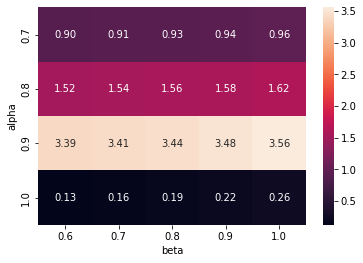

In [177]:
sns.heatmap(a_b_df.pivot('alpha', 'beta', 'rmse'), annot=True, fmt='.2f')

In [178]:
w1_w2_df = result_df[['w1', 'w2', 'rmse']].groupby(['w1', 'w2']).min().reset_index()

<AxesSubplot:xlabel='w2', ylabel='w1'>

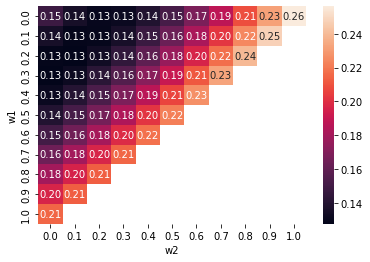

In [179]:
sns.heatmap(w1_w2_df.pivot('w1', 'w2', 'rmse'), annot=True, fmt='.2f')

# Parameter selection round 2

看起来alpha大一点

In [187]:
alphas = [0.5, 0.55, 0.6, 0.95, 1.0]
betas = [0.4, 0.5, 0.6, 0.7]
w1s = w2s = [0.0, 0.05, 0.1 ,0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
weights = [(w1, w2) for w1 in w1s for w2 in w2s if w1 + w2 <= 1 ]
parameters = [(alpha, beta, w1, w2) for alpha in alphas for beta in betas for w1, w2 in weights]

In [188]:
results = run_grid_search(parameters)

  4%|▍         | 170/3780 [12:24<4:23:31,  4.38s/it]


KeyboardInterrupt: 

In [ ]:
transition_matrix = beta*(w1*transition_matrix_item + w2*transition_matrix_BG + (1-w1-w2)*transition_matrix_genre) + (1-beta)/n_items
best_prediction = random_walk_predict(train_ui_matrix, transition_matrix, alpha)
best_error = rmse(best_prediction, test_ui_matrix)

# Computing Performance

In [144]:
# %%timeit
alpha, beta, w1, w2 = 0.8, 0.6, 0.6, 0.2
transition_matrix = beta*(w1*transition_matrix_item + w2*transition_matrix_BG + (1-w1-w2)*transition_matrix_genre) + (1-beta)/n_items
prediction = random_walk_predict(train_ui_matrix, transition_matrix, alpha)
error = rmse(prediction, test_ui_matrix)

In [145]:
print('rmse for random walk: {}'.format(error))

rmse for random walk: 2.454602665548794
